<a href="https://colab.research.google.com/github/pnjha/APS_Project/blob/master/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U -q PyDrive
!apt-get install cython
!pip install planarity
!pip install graphviz
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

E: Could not open lock file /var/lib/dpkg/lock - open (13: Permission denied)
E: Unable to lock the administration directory (/var/lib/dpkg/), are you root?
  Using cached https://files.pythonhosted.org/packages/85/29/ccdbce68ba5fb97fd11c08e3cc79576f13e6e300d32a7953cd4c878c0996/Cython-0.29-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/82/a1/ba6fb41367b375f5cb653d1317d8ca263c636cff6566e2da1b0da716069d/setuptools-40.5.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1f/e2/ef2581b5b86625657afd32030f90cf2717456c1d2b711ba074bf007c0f1a/graphviz-0.10.1-py2.py3-none-any.whl
E: Could not open lock file /var/lib/dpkg/lock - open (13: Permission denied)
E: Unable to lock the administration directory (/var/lib/dpkg/), are you root?


In [3]:
import time
import sys
import networkx as nx
import itertools as it
import planarity 
import random
from networkx.algorithms import bipartite
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv


In [4]:
def floydWarshall(dist,vertices): 
	for k in range(vertices-1): 
		for i in range(vertices-1): 
			for j in range(vertices-1): 
				dist[i][j] = min(dist[i][j],dist[i][k]+dist[k][j])

In [5]:
def DPC(graph,vertices):

    for k in range(vertices-2, -1, -1):
        for j in range(0,k):
            for i in range(0,j):
                if graph[i][k] != float('inf') and graph[k][j] != float('inf'):
                    graph[i][j] = min(graph[i][j], graph[i][k]+graph[k][j])    
                if graph[j][k] != float('inf') and graph[k][i] != float('inf'):
                    graph[j][i] = min(graph[j][i], graph[j][k]+graph[k][i])
                if graph[i][j]+graph[j][i] < 0:
                    return False
    return True ,graph

In [6]:
def snowball(dist,vertices):
    graph = dist
    for k in range(vertices-1):
        for j in range(k-1, 0, -1):
            for i in range(0, k):
                dist[i][k] = min(dist[i][k], dist[i][j]+graph[j][k])
                dist[k][i] = min(dist[k][i], dist[j][i]+graph[k][j])


In [7]:
def createMatrix(vertices):

	#************* Reading from file ****************************************

	filename = 'planar_'+str(vertices)+'_nodes.txt'

	x,y,z= np.loadtxt(filename, delimiter = "\t", unpack = True)

	#************************************************************************

	#************ Generating Incident Matrix ********************************

	G = nx.Graph()
	G.add_nodes_from([1,vertices])


	for x1,y1,z1 in zip(x,y,z):
		x1 = int(x1)
		y1 = int(y1)
		z1 = int(z1)        
		G.add_edge(x1,y1,weight = z1)

	#**************************************************************************

	#************ Generating 2D adjacency matric ******************************

	A = nx.adjacency_matrix(G)
	b = A.todense()

	gr = []
	gr = nx.to_numpy_matrix(G)
	llist = []
	graph = []
	counter = 0
	c = 0
	for x in np.nditer(gr):
		c += 1
		if counter == vertices:
			counter = 0
			graph.append(llist)
			llist = []

		if x == 0:
			llist.append(float('inf'))
			counter += 1
		else:
			llist.append(int(x))
			counter += 1	
	return graph		



4


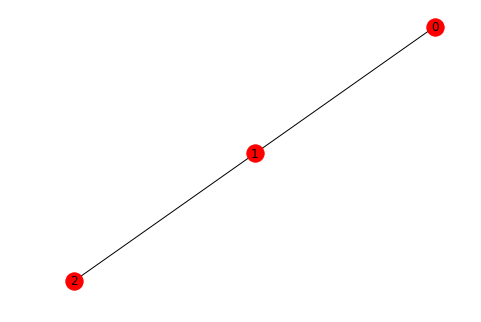

In [64]:
vertices = 4
graph = createMatrix(vertices)
flag, graph = DPC(graph,vertices)
plotGraph(graph,vertices)

In [ ]:
vertex = [10,50,100,500,1000]

#************************************************************************

#***************** Executing and measuring time **************

FTIME = []
STIME = []

for value in vertex:

	graph = createMatrix(value)

	start = time.time()
	floydWarshall(graph,value)
	end = time.time()
	FTIME.append(end - start)


	flag, graph = DPC(graph,value)		

	if flag == True:
		start = time.time()
		snowball(graph,value)
		end = time.time()
		STIME.append(end - start)

# for duration in FTIME:
# 	print duration

# for duration in STIME:
# 	print duration

# plotGraph()

plt.plot(vertex, FTIME, 'r--', label = 'Floyd Warshall Algorithm')
plt.plot(vertex, STIME, 'b--', label = 'Snowball Algorithm')	
plt.yscale("log")
plt.xlabel('vertices')
plt.ylabel('Running time (seconds,log scale)')
plt.title('Comparision of Floyd Warshall Algorithm and Snowball Algorithm')
plt.legend()
plt.show()

In [63]:
def plotGraph(graph,vertices):
    G = nx.Graph()
    print vertices
    for x in range(0, vertices-1, 1):
        for y in range(0, vertices-1, 1):
            if graph[x][y] != float('inf'):
                x = int(x)
                y = int(y)
                G.add_edge(x,y,weight = graph[x][y])
    
    nx.draw(G, with_labels=True) 